In [1]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
from metpy.cbook import get_test_data

from netCDF4 import Dataset
from scipy.io import netcdf
import numpy as np

In [2]:
ds = xr.open_dataset("med-hcmr-wav-an-fc-h_1637504789598.nc") # wave on 21th Nov
print(ds)
#print("--------------------------------------------------------------------------------")
#print(ds.sel)  # they seems the same thing

<xarray.Dataset>
Dimensions:    (latitude: 380, time: 24, longitude: 1307)
Coordinates:
  * latitude   (latitude) float32 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98
  * time       (time) datetime64[ns] 2021-11-21 ... 2021-11-21T23:00:00
  * longitude  (longitude) float32 -18.12 -18.08 -18.04 ... 36.21 36.25 36.29
Data variables:
    VSDX       (time, latitude, longitude) float32 ...
    VSDY       (time, latitude, longitude) float32 ...
    VHM0       (time, latitude, longitude) float32 ...
Attributes: (12/15)
    bulletin_type:                   forecast
    institution:                     Hellenic Centre for Marine Research (HCM...
    source:                          MEDWAM3
    credit:                          Copernicus Marine Environment Monitoring...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    producer:                        CMEMS-MED Monitoring and Forecasting Centre
    ...                              ...
    area:                         

In [3]:
#data_var = ds.metpy.parse_cf('VHM0')
#print(data_var)
#print("--------------------------------------------------------------------------------")
print(ds['VHM0']) 
print("--------------------------------------------------------------------------------")
print(ds.latitude)
#print("--------------------------------------------------------------------------------")
#print(data_var.latitude)
y = ds.latitude
x = ds.longitude
Hs0 = ds['VHM0'].isel(time=0)
print("--------------------------------------------------------------------------------")
print(Hs0) 

<xarray.DataArray 'VHM0' (time: 24, latitude: 380, longitude: 1307)>
[11919840 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98
  * time       (time) datetime64[ns] 2021-11-21 ... 2021-11-21T23:00:00
  * longitude  (longitude) float32 -18.12 -18.08 -18.04 ... 36.21 36.25 36.29
Attributes:
    long_name:         Spectral significant wave height (Hm0)
    standard_name:     sea_surface_wave_significant_height
    units:             m
    type_of_analysis:  spectral analysis
    WMO:               100
    _ChunkSizes:       [   1  380 1307]
--------------------------------------------------------------------------------
<xarray.DataArray 'latitude' (latitude: 380)>
array([30.1875  , 30.229166, 30.270834, ..., 45.895832, 45.9375  , 45.979168],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 30.19 30.23 30.27 30.31 ... 45.9 45.94 45.98
Attributes:
    standard_name:        latitude
    units:           

NameError: name 'xm' is not defined

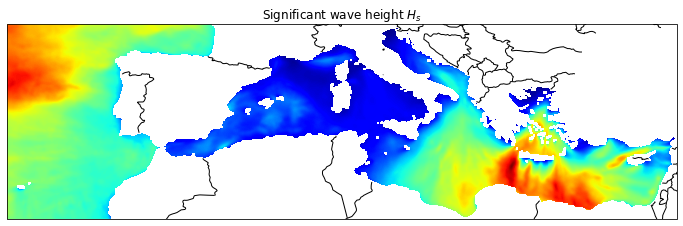

In [5]:
fig = plt.figure(figsize=(12, 10)) #open figure with size you need

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #adding project within the opened figure
mp = ax.imshow(Hs0,extent=(x.min(),x.max(), y.min(), y.max()),cmap='jet', origin='lower')

plt.title('Significant wave height $H_s$', fontsize=12)

#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS)
#ax.add_feature(states_provinces, edgecolor='blue')
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)

# adding colorbar and adjust the size
cbar = fig.colorbar(mp, shrink=0.3)
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# here where magic happen

plt.savefig("WRF_test.jpg")